In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# read the image
image = cv2.imread("../data/images/bedroom-7132435_640.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

We need to flatten the height and width into a single vector of pixels (3 RGB values) since kmeans takes a 2D array as input

In [28]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

Define hyperparameters for kmeans

In [29]:
k = 8 # Number of clusters
max_iter = 100
eps = 0.2 # Minimum epsilon distance to stop iterations

In [30]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, eps)

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, max_iter, cv2.KMEANS_RANDOM_CENTERS)

Construct the segmented image

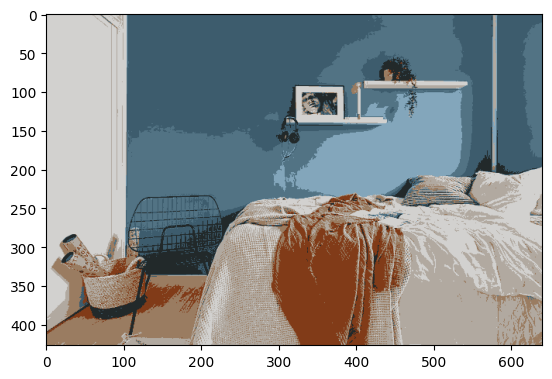

In [31]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

Disable a determined cluster

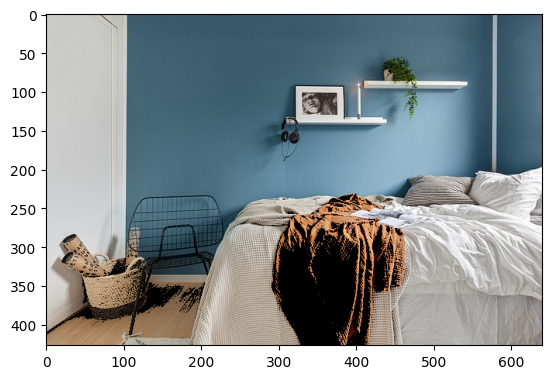

In [43]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 7
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()